# CIFAR-10 image classification using Convolution Neural Network

In this notebook we will show:

- Understanding CIFAR-10 data
- Use MLP-ANN model to train on CIFAR-10 data and measure its performance
- Use CNN model to train on CIFAR-10 data and measure its performance and then compare the same with MLP-ANN

## Understanding the data

In [33]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input, Model
import matplotlib.pyplot as plt

### Download the CIFAR10 datasets

There are total 60000 color (RGB) images in 10 classes with 6000 images in each class. 
The dataset is divided into 50000 training and 10000 testing images.

In [3]:
(training_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 190s 1us/step


### Normalize the pixel values

In [4]:
training_images, test_images = training_images/255.0 , test_images/255.0

In [10]:
training_images.shape

(50000, 32, 32, 3)

In [13]:
test_images.shape

(10000, 32, 32, 3)

### Visualize the data

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

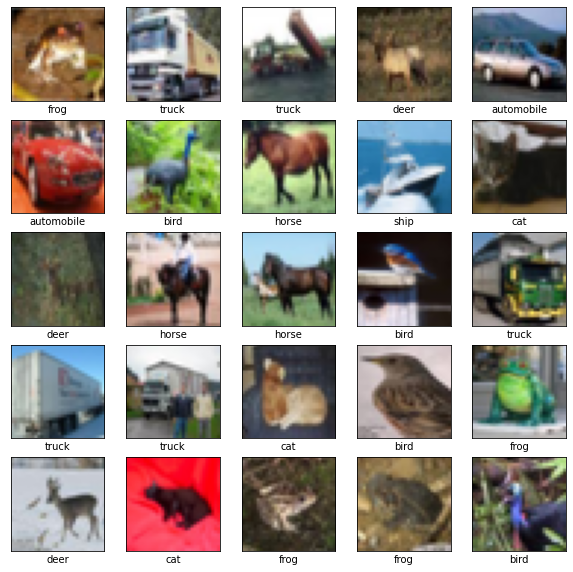

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Deep dive into any one particular image

In [9]:
import numpy as np

In [20]:
index = np.random.randint(low=0, high=training_images.shape[0], size=1)[0]
index

35236

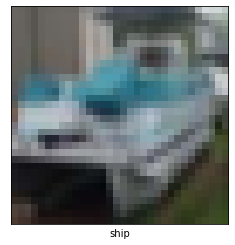

In [23]:
img = training_images[index]

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.xlabel(class_names[train_labels[index][0]])
plt.xticks([])
plt.yticks([])
plt.show()

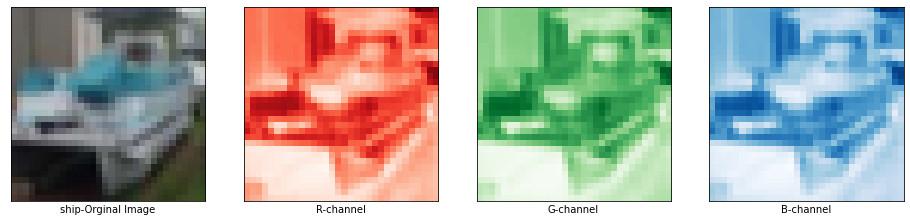

In [24]:
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.imshow(img)
plt.xlabel(class_names[train_labels[index][0]] + "-Orginal Image")
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.imshow(img[:,:,0], cmap='Reds')
plt.xlabel("R-channel")
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.imshow(img[:,:,1], cmap='Greens')
plt.xlabel("G-channel")
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.imshow(img[:,:,0], cmap='Blues')
plt.xlabel("B-channel")
plt.xticks([])
plt.yticks([])

plt.show()

## MLP model

### Prepare the data for MLP model

In [28]:
X_train_mlp = training_images.reshape(training_images.shape[0],-1)

In [29]:
X_train_mlp.shape

(50000, 3072)

In [30]:
X_test_mlp = test_images.reshape(test_images.shape[0], -1)

X_test_mlp.shape

(10000, 3072)

### Create the MLP-ANN model

- The input layer will have 3072 nodes
- There will be three hidden layers
  - hidden_layer_1 : It will have 1600 nodes with ReLU activation.
  - hidden_layer_2 : It will have 800 nodes with ReLU activation.
  - hidden_layer_3 : It will have 100 nodes with ReLU activation.
- Finally there will be classification layer (softmax layer). There are 10 classes. Hence, 10 output nodes.

In [32]:
ip = Input(shape=X_train_mlp.shape[-1])
h1 = layers.Dense(1600, activation='relu')(ip)
h2 = layers.Dense(800, activation='relu')(h1)
h3 = layers.Dense(100, activation='relu')(h2)
op = layers.Dense(10, activation='softmax')(h3)

In [34]:
mlp_model = Model(inputs = ip, outputs = op)

In [39]:
mlp_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 1600)              4916800   
                                                                 
 dense_1 (Dense)             (None, 800)               1280800   
                                                                 
 dense_2 (Dense)             (None, 100)               80100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,278,710
Trainable params: 6,278,710
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [37]:
mlp_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

### Train the model

In [38]:
history = mlp_model.fit(X_train_mlp, train_labels, epochs=20, batch_size=128, 
                       validation_data=(X_test_mlp, test_labels), validation_batch_size=128)

Epoch 1/20
391/391 [==============================] - 30s 76ms/step - loss: 1.8049 - accuracy: 0.3511 - val_loss: 1.6681 - val_accuracy: 0.4025
Epoch 2/20
391/391 [==============================] - 28s 72ms/step - loss: 1.6485 - accuracy: 0.4110 - val_loss: 1.6073 - val_accuracy: 0.4314
Epoch 3/20
391/391 [==============================] - 25s 65ms/step - loss: 1.5645 - accuracy: 0.4417 - val_loss: 1.5073 - val_accuracy: 0.4634
Epoch 4/20
391/391 [==============================] - 24s 62ms/step - loss: 1.5039 - accuracy: 0.4620 - val_loss: 1.5178 - val_accuracy: 0.4580
Epoch 5/20
391/391 [==============================] - 24s 63ms/step - loss: 1.4638 - accuracy: 0.4767 - val_loss: 1.4832 - val_accuracy: 0.4715
Epoch 6/20
391/391 [==============================] - 27s 69ms/step - loss: 1.4309 - accuracy: 0.4867 - val_loss: 1.4766 - val_accuracy: 0.4714
Epoch 7/20
391/391 [==============================] - 26s 68ms/step - loss: 1.3907 - accuracy: 0.5019 - val_loss: 1.5421 - val_accuracy:

### Evaluate the model performance

#### Accuracy vs Epochs plot

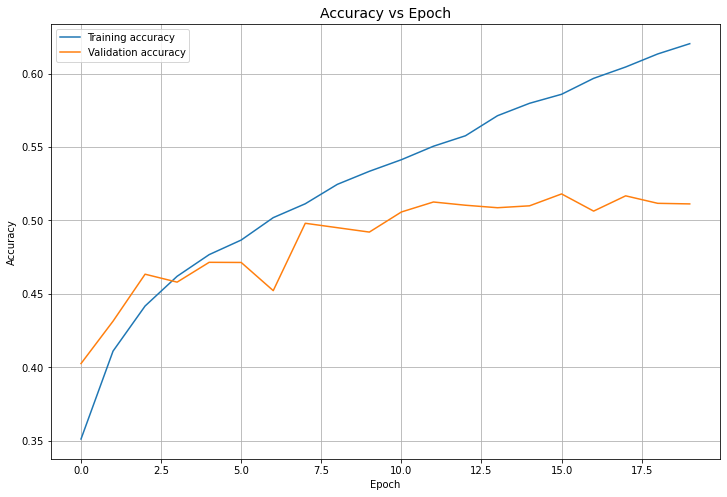

In [45]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.title("Accuracy vs Epoch", fontsize=14)
plt.show()

#### Loss vs Epochs plot

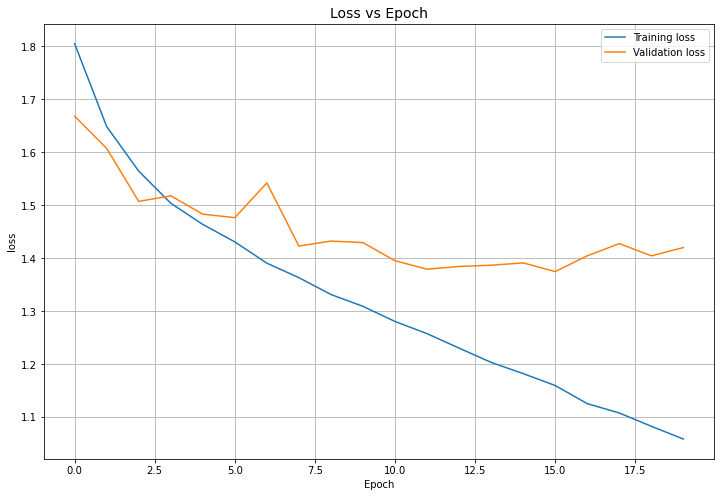

In [46]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.title("Loss vs Epoch", fontsize=14)
plt.show()

#### Evaluation on test dataset

In [47]:
test_loss_mlp, test_accuracy_mlp = mlp_model.evaluate(X_test_mlp, test_labels, verbose=2)

313/313 - 3s - loss: 1.4202 - accuracy: 0.5113 - 3s/epoch - 9ms/step


In [50]:
print(f"Test accuracy of MLP model: {round(100*test_accuracy_mlp, 2)}%")

Test accuracy of MLP model: 51.13%


In [52]:
print(f"Test loss of MLP model: {round(test_loss_mlp, 2)}")

Test loss of MLP model: 1.42


## CNN model

### Create the CNN model

In [58]:
ip = Input(shape=training_images[0].shape)
conv1 = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(ip)
maxpool1 = layers.MaxPool2D((2,2))(conv1)
conv2 = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(maxpool1)
maxpool2 = layers.MaxPool2D((2,2))(conv2)
conv3 = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(maxpool2)
flat = layers.Flatten()(conv3)
dense = layers.Dense(64, activation='relu')(flat)
op = layers.Dense(10, activation='softmax')(dense)

In [59]:
cnn_model = Model(inputs=ip, outputs=op)

In [60]:
cnn_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 64)          3692

### Compile the model

In [62]:
cnn_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

### train the model

In [63]:
history_cnn = cnn_model.fit(training_images, train_labels, epochs=20, batch_size=128, 
                            validation_data=(test_images, test_labels), validation_batch_size=128)

Epoch 1/20
391/391 [==============================] - 40s 101ms/step - loss: 1.6466 - accuracy: 0.4013 - val_loss: 1.4104 - val_accuracy: 0.4905
Epoch 2/20
391/391 [==============================] - 41s 104ms/step - loss: 1.2777 - accuracy: 0.5456 - val_loss: 1.1555 - val_accuracy: 0.5943
Epoch 3/20
391/391 [==============================] - 44s 112ms/step - loss: 1.1217 - accuracy: 0.6039 - val_loss: 1.0881 - val_accuracy: 0.6118
Epoch 4/20
391/391 [==============================] - 43s 110ms/step - loss: 1.0186 - accuracy: 0.6453 - val_loss: 0.9999 - val_accuracy: 0.6467
Epoch 5/20
391/391 [==============================] - 44s 112ms/step - loss: 0.9436 - accuracy: 0.6701 - val_loss: 0.9393 - val_accuracy: 0.6677
Epoch 6/20
391/391 [==============================] - 47s 119ms/step - loss: 0.8816 - accuracy: 0.6943 - val_loss: 0.9127 - val_accuracy: 0.6826
Epoch 7/20
391/391 [==============================] - 45s 116ms/step - loss: 0.8271 - accuracy: 0.7115 - val_loss: 0.8832 - val_ac

### Evaluate the model performance

#### Accuracy vs Epochs plot

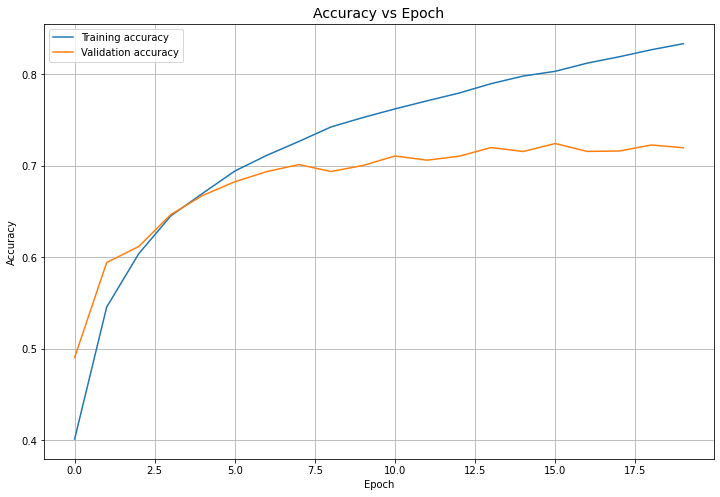

In [64]:
plt.figure(figsize=(12,8))
plt.plot(history_cnn.history['accuracy'], label='Training accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.title("Accuracy vs Epoch", fontsize=14)
plt.show()

#### Loss vs Epochs plot

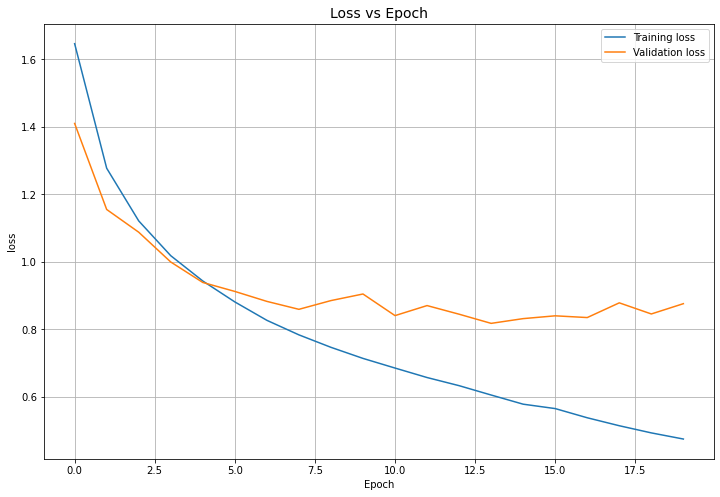

In [65]:
plt.figure(figsize=(12,8))
plt.plot(history_cnn.history['loss'], label='Training loss')
plt.plot(history_cnn.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.title("Loss vs Epoch", fontsize=14)
plt.show()

#### Evaluation on the test dataset

In [66]:
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.8764 - accuracy: 0.7198 - 2s/epoch - 6ms/step


In [67]:
print(f"Test accuracy of CNN model: {round(100*test_accuracy_cnn, 2)}%")

Test accuracy of CNN model: 71.98%


In [68]:
print(f"Test loss of CNN model: {round(test_loss_cnn, 2)}")

Test loss of CNN model: 0.88


## Conclusion

CNN model outperforms MLP model in the task of image classification.